# P105 Computational HW solutions

## Question 1: Rigid body rotation

### Learning objectives
In this question you will:

- analytically derive Euler's equations and study the behaviour near equilibria
- numerically solve the equations and compare to theoretical expectations
- simulate the free rotation of real objects and compare to empirical evidence


Let us study the rotation of a rigid body. Recall the definitions of the angular velocity vector $\boldsymbol\omega$, the moment of inertia tensor $I_{ij} = \int d^3\mathbf{r}\:\rho(\mathbf r)(r^2\delta_{ij}-r_ir_j)$, and angular momentum vector $\mathbf L=I\cdot \boldsymbol\omega$. Recall that the torque determines the rate of change of angular momentum $\boldsymbol\tau = \dot{\mathbf L}$.

Let's analyse the system in the body-frame in which the moment of inertia is diagonal, i.e. $$I=\begin{pmatrix}I_1&0&0\\0&I_2&0\\0&0&I_3\end{pmatrix}.$$ Let's call the basis vectors $\mathbf e_1$, $\mathbf e_2$, and $\mathbf e_3$. Don't forget that $\mathbf e_i$ change with time. In this basis, the angular momentum is $\mathbf L = I_1 \omega_1\mathbf e_1 + I_2\omega_2\mathbf e_2 + I_3\omega_3\mathbf e_3$. Assuming there are no torques, derive the Euler equations,\begin{align}I_1\dot\omega_1&=(I_2-I_3)\omega_2\omega_3,\\I_2\dot\omega_2&=(I_3-I_1)\omega_1\omega_3,\\I_3\dot\omega_3&=(I_1-I_2)\omega_1\omega_2.\end{align} (Hint: for a rigid body the moment of inertia tensor is constant in the body frame. Remember than the rate of change of any vector $\mathbf v$ rotationg with angular velocity $\boldsymbol\omega$ is given by $\dot{\mathbf v}=\boldsymbol\omega\times\mathbf v$.)

In the absence of torques, $\mathbf L$ is conserved, i.e. $$\dot{\mathbf L} = I_1 \dot{\omega}_1\mathbf e_1 + I_2\dot{\omega}_2\mathbf e_2 + I_3\dot{\omega}_3\mathbf e_3 + I_1 \omega_1\dot{\mathbf e}_1 + I_2\omega_2\dot{\mathbf e}_2 + I_3\omega_3\dot{\mathbf e}_3=0.$$ Now the rates of change of the basis vectors are \begin{align}\dot{\mathbf e}_1=\boldsymbol\omega\times\mathbf e_1=\omega_3\mathbf e_2-\omega_2\mathbf e_3,\\\dot{\mathbf e}_2=\boldsymbol\omega\times\mathbf e_2=\omega_1\mathbf e_3-\omega_3\mathbf e_1,\\\dot{\mathbf e}_3=\boldsymbol\omega\times\mathbf e_3=\omega_2\mathbf e_1-\omega_1\mathbf e_2.\end{align}

Plugging this back into the conservation of angular momentum, we obtain $$(I_1\dot\omega_1-I_2\omega_2\omega_3+I_3\omega_3\omega_2)\mathbf e_1+(I_2\dot\omega_2+I_1\omega_1\omega_3-I_3\omega_3\omega_1)\mathbf e_2+(I_3\dot\omega_3-I_1\omega_1\omega_2+I_2\omega_2\omega_1)\mathbf e_3=0,$$ which are the Euler equations.

### 1a. 

Fill in the following function to numerically integrate the Euler equations. No need to use a sophisticated integrator; we can use small step sizes if required.

#### <font color='red'>Solution:</font>

In [1]:
import numpy as np

def euler(omega0, I1, I2, I3, times):
    """
    (All quantities in body frame, in diagonal basis of inertia tensor)
    omega0: initial angular velocity, array of shape (3,) 
    I1,I2,I3: principal moments of inertia, scalars
    times: array of times at which to find omega, array of shape (N,)
    returns: omegas at times, array of shape (N,3)
    """
    omegas = np.zeros((len(times),3))
    omegas[0] = omega0
    for i in range(len(times)-1):
        dt = times[i+1]-times[i]
        omegas[i+1] = omegas[i]
        omegas[i+1,0] += (I2-I3)*omegas[i,1]*omegas[i,2]/I1*dt
        omegas[i+1,1] += (I3-I1)*omegas[i,0]*omegas[i,2]/I2*dt
        omegas[i+1,2] += (I1-I2)*omegas[i,0]*omegas[i,1]/I3*dt
    return omegas

### 1b. 

What happens when $\boldsymbol\omega_0$ is aligned with one of the principal moments of inertia? Check that your function `euler()` returns what you expect in this situation. Also, try writing $\omega = (\omega_0,\epsilon,\epsilon)$ for the case of an axisymmetric object with $I_2=I_3$.  Does the time series of $\omega$ behave as expected?

#### <font color='red'>Solution:</font>

If only one component of $\boldsymbol\omega$ is non-zero, then $\boldsymbol\omega$ is constant (since the RHS is always a product of two components) and the motion is simple constant rotation. 

In [2]:
times = np.linspace(0,50,1000)
euler([1,0,0],1.2,1,1,times)
#"We observe the motion does not change"


array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [3]:
euler([0,1,0],2,1,.1,times)

array([[ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       ..., 
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.]])

In [4]:
euler([0,0,1],2,1,.1,times)

array([[ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.]])

If $\omega$ has small perturbations in the second two components for $I_2=I_3$, we observe precession about $I_1$

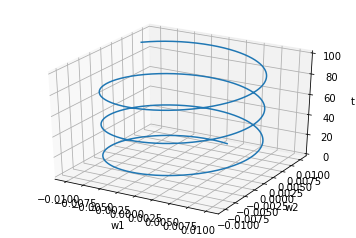

In [5]:
times = np.linspace(0,100,10000)
w=euler([1,0.001,0.01],1.2,1,1,times)
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
w2=w[:,1]
w3=w[:,2]
t=times
plt.rcParams['legend.fontsize'] = 5

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(w2, w3, t, label='parametric curve')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('t')

plt.show()

# We observe the angular velocity vector precesses around the first component and that it is stable (although note if you make the time steps too large it will begin to accumulate error)


### 1c. 

We show that if two of the principal moments are equal, then $\omega$ precesses around the third principal moment. (Think of a spinning coin without gravity, or an American football.) Then we find the angular velocity of precession $\omega_p=\frac{2\pi}{T_p}$ in terms of the parameters already defined.

Let's analyse the system in the body-frame in which the moment of inertia is diagonal, i.e. $$I=\begin{pmatrix}I_1&0&0\\0&I_2&0\\0&0&I_3\end{pmatrix}.$$ Let's call the basis vectors $\mathbf e_1$, $\mathbf e_2$, and $\mathbf e_3$. Don't forget that $\mathbf e_i$ change with time. In this basis, the angular momentum is $\mathbf L = I_1 \omega_1\mathbf e_1 + I_2\omega_2\mathbf e_2 + I_3\omega_3\mathbf e_3$. 

In the absence of torques, $\mathbf L$ is conserved, i.e. $$\dot{\mathbf L} = I_1 \dot{\omega}_1\mathbf e_1 + I_2\dot{\omega}_2\mathbf e_2 + I_3\dot{\omega}_3\mathbf e_3 + I_1 \omega_1\dot{\mathbf e}_1 + I_2\omega_2\dot{\mathbf e}_2 + I_3\omega_3\dot{\mathbf e}_3=0.$$ Now the rates of change of the basis vectors are \begin{align}\dot{\mathbf e}_1=\boldsymbol\omega\times\mathbf e_1=\omega_3\mathbf e_2-\omega_2\mathbf e_3,\\\dot{\mathbf e}_2=\boldsymbol\omega\times\mathbf e_2=\omega_1\mathbf e_3-\omega_3\mathbf e_1,\\\dot{\mathbf e}_3=\boldsymbol\omega\times\mathbf e_3=\omega_2\mathbf e_1-\omega_1\mathbf e_2.\end{align}

Plugging this back into the conservation of angular momentum, we obtain $$(I_1\dot\omega_1-I_2\omega_2\omega_3+I_3\omega_3\omega_2)\mathbf e_1+(I_2\dot\omega_2+I_1\omega_1\omega_3-I_3\omega_3\omega_1)\mathbf e_2+(I_3\dot\omega_3-I_1\omega_1\omega_2+I_2\omega_2\omega_1)\mathbf e_3=0,$$ which are the Euler equations.


\begin{align}I_1\dot\omega_1&=(I_2-I_3)\omega_2\omega_3,\\I_2\dot\omega_2&=(I_3-I_1)\omega_1\omega_3,\\I_3\dot\omega_3&=(I_1-I_2)\omega_1\omega_2.\end{align} 

Use your solution `euler()` to estimate the precession rate $\omega_p$ of an object with $I_1=2$, $I=1$, and $\boldsymbol\omega = (1,1,1)^T$ (e.g. you can find the first non-zero time when $|\boldsymbol\omega-\boldsymbol\omega_0|<\epsilon$ for some $\epsilon\ll1$). Compare with theoretical expectations.

#### <font color='red'>Solution:</font>

In [6]:
times = np.linspace(0,10,2000)
omega0 = np.array([1,1,1])
omegas = euler(omega0,2,1,1,times)

def find_rotation_period(vectors,times,epsilon=1e-3,time_threshold=0.1):
    similar = np.sum((omegas-omega0.reshape((1,3)))**2, axis=1) < epsilon
    indices = similar & (times > time_threshold)
    return np.mean(times[indices])

2*np.pi/find_rotation_period(omegas,times)

1.0000069609117828

We expect $\omega_p=1$, so this is quite close.

### 1d. 

Recall than in torque-free motion the energy is given by the kinetic energy, $T=\frac{1}{2}\boldsymbol\omega\cdot I\cdot\boldsymbol\omega.$ Fill in the following function that calculates the energy from a given $\boldsymbol\omega$ and $I$ in the preferred body frame.

#### <font color='red'>Solution:</font>

In [7]:
def energy(omega,I1,I2,I3):
    """
    omega: angular velocity vector, shape (3,)
    I1,I2,I3: principal moments of inertia, scalars
    returns: energy, scalar
    """
    return 0.5*np.sum(omega**2*np.array([I1,I2,I3]))

### 1e. 

In $\boldsymbol\omega$-space, what shape do the energy contours take? Recall that since energy is conserved, $\boldsymbol\omega$ is constrained to be on such surfaces.

The following function is supposed to plot multiple trajectories overlaid on the allowed energy surface. It is almost complete, except that it currently plots the energy surface as the unit sphere regardless of input. Complete the function. (Hint: you can obtain the energy surfaces by re-scaling the dimensions of a sphere.)

#### <font color='red'>Solution:</font>

The energy contours are ellipsoids.

In [8]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
#use %matplotlib inline if notebook doesn't work..

def plot_trajectories(trajectories,I1,I2,I3):
    """
    trajectories: array of shape (M,N,3) containing M omega vectors at N time-steps
                (all omega vectors assumed to be at the same energy)
    I1, I2, I3: principal moments of inertia
    returns nothing, plots trajectories as lines in 3d plot overlaid on energy 
                ellipsoid (using energy of first omega vector of first trajectory)
    """
    N = 20
    theta,phi = np.linspace(0,np.pi,N),np.linspace(0,2*np.pi,2*N)
    theta, phi = np.meshgrid(theta, phi) #surface is 2d, need 2d array of points
    
    T = energy(trajectories[0,0],I1,I2,I3)

    x = np.sin(theta)*np.cos(phi)*(2*T/I1)**.5
    y = np.sin(theta)*np.sin(phi)*(2*T/I2)**.5
    z = np.cos(theta)*(2*T/I3)**.5

    fig = plt.figure(figsize=(8,8))
    ax = Axes3D(fig) #create Axes3D object to display the plot
    ax.plot_surface(x,y,z,alpha=.2,facecolors=[["w"]*N]*2*N)
    ax.set_xlabel("$\omega_1$")
    ax.set_ylabel("$\omega_2$")
    ax.set_zlabel("$\omega_3$")
    
    bound = np.amax([x,y,z])
    ax.set_xlim(-bound,bound)
    ax.set_ylim(-bound,bound)
    ax.set_zlim(-bound,bound)
    
    for omegas in trajectories:
        ax.plot(*omegas.T)

### 1f. 

The following cell plots the trajectories of some randomly chosen initial $\boldsymbol\omega$s. You can use your visualisation of energy and your implementation of `euler()` to test each other. Once your energy visualisation is consistent with your plotted trajectories, try increasing the step size. What happens? What does this tell you about the integrator you are using?

#### <font color='red'>Solution:</font>

<IPython.core.display.Javascript object>


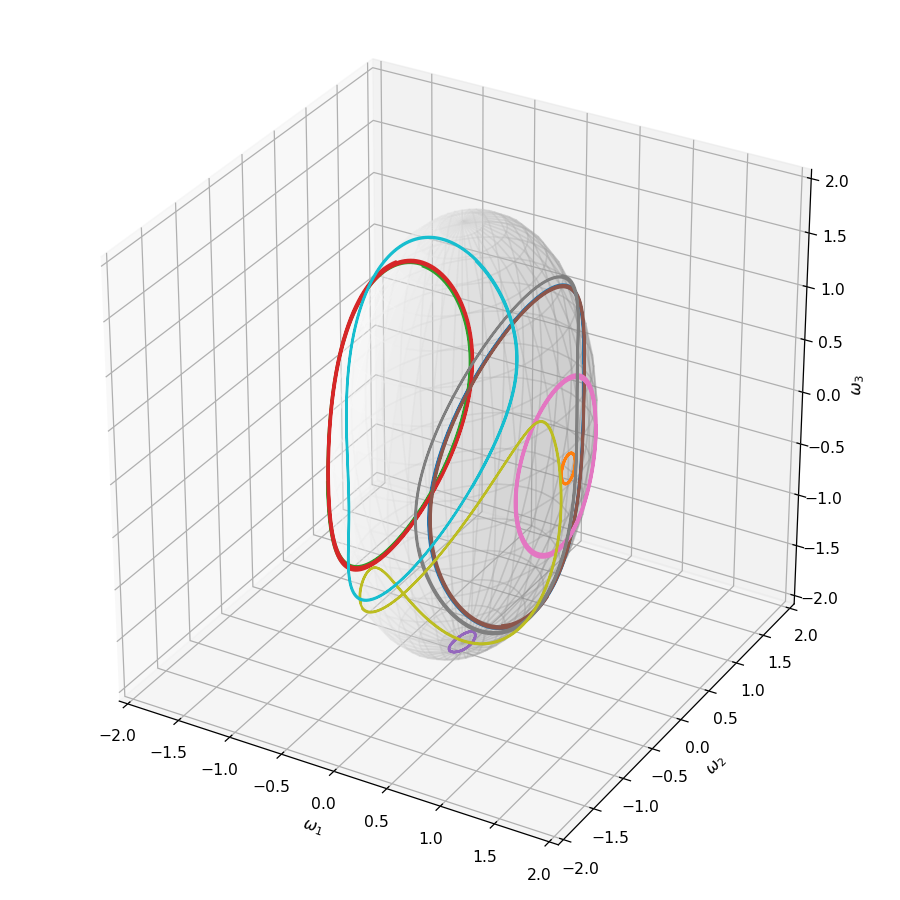

In [9]:
def get_random_initials(I1,I2,I3,energy=1,n=10):
    """
    I1,I2,I3: principal moments of inertia, scalars
    energy: energy of initial states
    n: number of points to sample
    returns: n randomly chosen omega vectors with given energy
    """
    randoms = np.zeros((n,3))
    for i in range(n): #sample uniformly from sphere using rejection
        x = np.random.rand(3)*2-1
        r = np.sum(x**2)
        while r > 1:
            x = np.random.rand(3)*2-1
            r = np.sum(x**2)
        randoms[i] = x/r**.5
    randoms[:,0] = randoms[:,0]*(2*energy/I1)**.5
    randoms[:,1] = randoms[:,1]*(2*energy/I2)**.5
    randoms[:,2] = randoms[:,2]*(2*energy/I3)**.5
    return randoms

%matplotlib notebook
I = 2,1,0.5
omega0s = get_random_initials(*I)
times = np.linspace(0,20,10000)
traj = np.array([euler(o,*I,times) for o in omega0s])
plot_trajectories(traj,*I)

We have to be careful to use a small step size since our simple integrator tends to accumulate errors, and leave the energy shell.

<IPython.core.display.Javascript object>


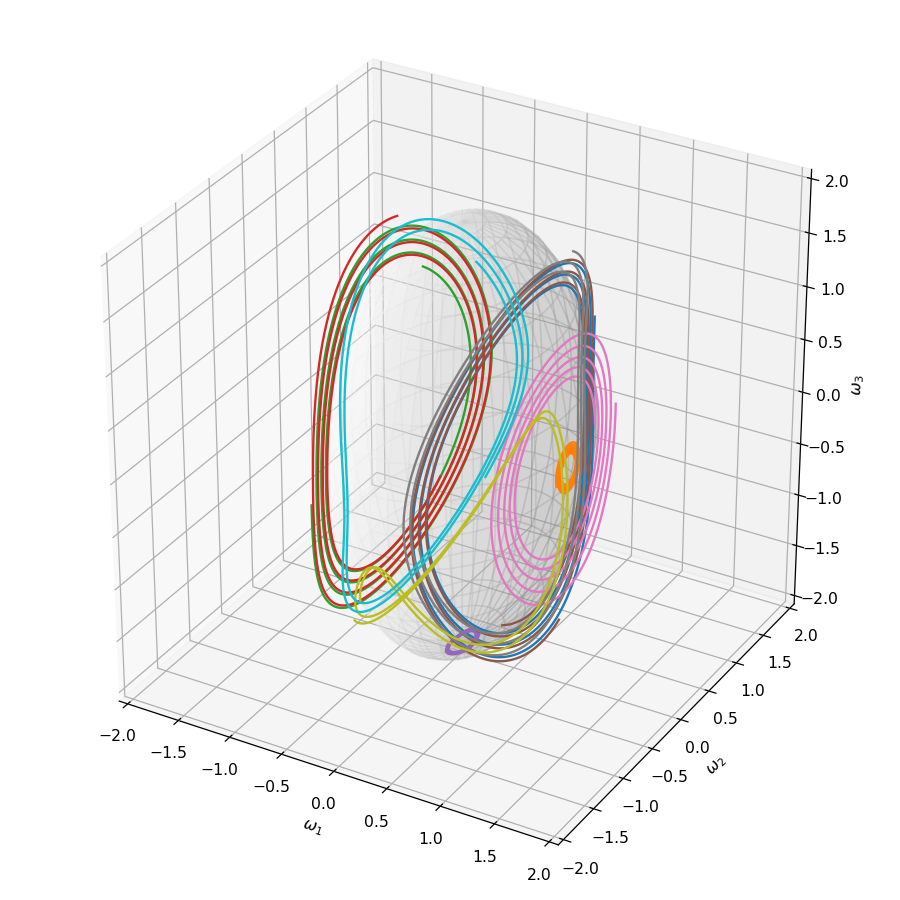

In [10]:
times = np.linspace(0,20,1000)
traj = np.array([euler(o,*I,times) for o in omega0s])
plot_trajectories(traj,*I)